# CNNs Assignment
---

## Malaria Cell Images Classification

In this assignment you will work with the Malaria Cell Images dataset obtained from the [Libster Hill National Center for Biomedical Communications](https://lhncbc.nlm.nih.gov/LHC-downloads/downloads.html#malaria-datasets).

**Import: Please use the zip file provided, as downloading the dataset directly from the above link might be complicated.**

Make sure to download and unzip the file in an easy to access location, since you have to access the cell images file path.

The unzipped file should contain 2 folders; Parasitized, Uninfected.

There are a total of 27,558 images.

**Goal: Create a CNN to classify the images into Parasitized (infected) or Uninfected. Your final model should have an accuracy of at least 94%.**

## Q1: Imports and Data Loading

Load the data by defining the path to the cell images folder.

In [114]:
pip install --upgrade tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [115]:
# Imports
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from PIL import Image
import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
# Import warnings to manage and filter warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='keras.src.trainers.data_adapters')

In [116]:
# Define path to data directory
data_dir = 'cell_images'

## Q2: EDA

**Use Python to navigate to the correct folder/subfolder to answer the following questions.
Your code MUST show the answer to these questions.**

- 2.1: Display the subfolders in the main cell images folder. Make sure it contains Parasitized and Uninfected
- 2.2: How many images are there total?
- 2.3: How many images are in the Parisitized folder?
- 2.4: How many images are in the Uninfected folder folder?
- 2.5: Grab any image from the Parisitized folder. Display this image using a visualization tool.
- 2.6: Grab any image from the Uninfected folder. Display this image using a visualization tool.
- 2.7: The images in both folders have different dimensions. What are the average dimensions for images in the Parasitized folder?
- 2.8: What are the average dimensions for images in the Uninfected folder?
- 2.9: From the above averages, define the values that you will use as the new target size for the images. 

In [117]:
# 2.1 

# List the subfolders in the main cell images folder
subfolders = [f.name for f in os.scandir(data_dir) if f.is_dir()]
print("Subfolders in the cell_images directory:", subfolders)

# Ensure it contains Parasitized and Uninfected
assert 'Parasitized' in subfolders, "'Parasitized' folder is missing."
assert 'Uninfected' in subfolders, "'Uninfected' folder is missing."

Subfolders in the cell_images directory: ['Parasitized', 'Uninfected']


In [118]:
# 2.2  How many images are there total?

# Get the list of image file paths
parasitized_path = os.path.join(data_dir, 'Parasitized')
uninfected_path = os.path.join(data_dir, 'Uninfected')
# Count the number of images in each subfolder
num_parasitized = len(glob.glob(os.path.join(parasitized_path, '*.png')))
num_uninfected = len(glob.glob(os.path.join(uninfected_path, '*.png')))

# Calculate the total number of images
total_images = num_parasitized + num_uninfected

print(f"Total number of images: {total_images}")

Total number of images: 27558


In [119]:
# 2.3

print(f"Number of Parasitized images: {num_parasitized}")

Number of Parasitized images: 13779


In [120]:
# 2.4

print(f"Number of Uninfected images: {num_uninfected}")

Number of Uninfected images: 13779


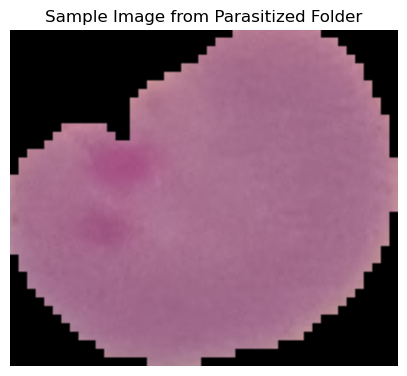

In [121]:
# 2.5

# Grab any image from the Parasitized folder
sample_image_path = parasitized_images[1000]  
sample_image = imread(sample_image_path)

# Display the image using matplotlib
plt.figure(figsize=(5, 5))
plt.imshow(sample_image)
plt.title('Sample Image from Parasitized Folder')
plt.axis('off')  
plt.show()

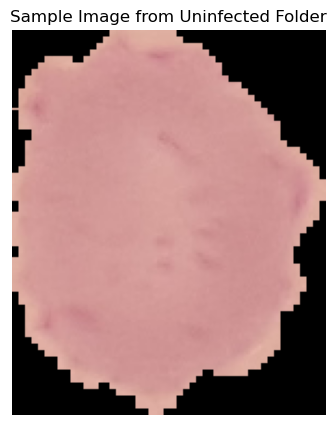

In [122]:
# 2.6

# Grab any image from the Uninfected folder
sample_image_path_uninfected = uninfected_images[13778]  
sample_image_uninfected = imread(sample_image_path_uninfected)

# Display the image using matplotlib
plt.figure(figsize=(5, 5))
plt.imshow(sample_image_uninfected)
plt.title('Sample Image from Uninfected Folder')
plt.axis('off')  
plt.show()

In [123]:
# 2.7

# Initialize variables to store total width, height, and the number of images
total_width = 0
total_height = 0
num_images = len(parasitized_images)

# Loop through all images in the Parasitized folder to accumulate their dimensions
for image_path in parasitized_images:
    img = Image.open(image_path)
    width, height = img.size
    total_width += width
    total_height += height

# Calculate average width and height
avg_width = total_width / num_images
avg_height = total_height / num_images

print(f"Average width for parasitized images: {avg_width:.2f} pixels")
print(f"Average height for parasitized images: {avg_height:.2f} pixels")

Average width for parasitized images: 133.63 pixels
Average height for parasitized images: 134.39 pixels


In [124]:
# 2.8

# Initialize variables to store total width, height, and the number of images
total_width_uninfected = 0
total_height_uninfected = 0
num_images_uninfected = len(uninfected_images)

# Loop through all images in the Uninfected folder to accumulate their dimensions
for image_path in uninfected_images:
    img = Image.open(image_path)
    width, height = img.size
    total_width_uninfected += width
    total_height_uninfected += height

# Calculate average width and height
avg_width_uninfected = total_width_uninfected / num_images_uninfected
avg_height_uninfected = total_height_uninfected / num_images_uninfected

print(f"Average width for Uninfected images: {avg_width_uninfected:.2f} pixels")
print(f"Average height for Uninfected images: {avg_height_uninfected:.2f} pixels")

Average width for Uninfected images: 131.34 pixels
Average height for Uninfected images: 131.58 pixels


In [125]:
# 2.9

# Target Size:
# Width: 130 pixels
# Height: 130 pixels
# It’s slightly below the average dimensions, which reduces the risk of excessive cropping or loss of important information. 

## Q3: ImageDataGenerator

- 3.1: Create an ImageDataGenerator for training data augmentation and preprocessing.
- 3.2: Plot an example of an augmented image. Hint: Use `random_transform()`.
- 3.3: Create the training data generator using augmentation.
- 3.4: Create an ImageDataGenerator for validation data.
- 3.5: Create the validation data generator.

Make sure to adjust the parameters according to the dataset and the type of problem you are solving.

In [126]:
# 3.1

# Define the target size based on the previous step
target_size = (130, 130)

# Create an ImageDataGenerator for training with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Rescale the pixel values to be between 0 and 1
    rotation_range=20,        # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,    # Randomly shift the width by up to 20% of the image size
    height_shift_range=0.2,   # Randomly shift the height by up to 20% of the image size
    shear_range=0.2,          # Shear transformation
    zoom_range=0.2,           # Randomly zoom into images by up to 20%
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest'       # Fill in new pixels created by the transformations
)

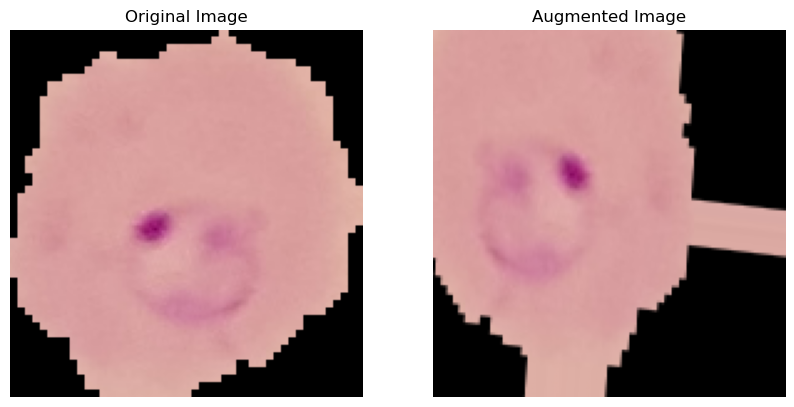

In [127]:
# 3.2

# Load an image from the Parasitized folder
sample_image_path = parasitized_images[0]  
sample_image = Image.open(sample_image_path)

# Convert image to array and rescale it 
sample_image_array = np.array(sample_image) / 255.0

# Apply random transformations using random_transform
augmented_image = train_datagen.random_transform(sample_image_array)

# Plot the original and augmented image
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(sample_image_array)
plt.title('Original Image')
plt.axis('off')

# Augmented image
plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title('Augmented Image')
plt.axis('off')

plt.show()

In [128]:
# 3.3

# Create the training data generator
train_generator = train_datagen.flow_from_directory(
    directory=data_dir,       # Path to the main directory containing Parasitized and Uninfected folders
    target_size=target_size,  # Resize images to target size (130x130)
    batch_size=32,            # Batch size 
    class_mode='binary',      # Since this is a binary classification problem
    shuffle=True              # Shuffle the data
)

# Displaying the class indices to confirm the mapping
print(f"Class indices: {train_generator.class_indices}")

Found 27558 images belonging to 2 classes.
Class indices: {'Parasitized': 0, 'Uninfected': 1}


In [129]:
# 3.4
# Create an ImageDataGenerator for validation data
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create the validation data generator
validation_generator = validation_datagen.flow_from_directory(
    directory=data_dir,       # Path to the main directory containing Parasitized and Uninfected folders
    target_size=(130, 130),   # Resize images to target size (130x130)
    batch_size=32,            # Batch size 
    class_mode='binary',      # Since this is a binary classification problem
    shuffle=False             # Do not shuffle, as we want to evaluate on the exact same data each epoch
)

Found 27558 images belonging to 2 classes.


In [130]:
# 3.5
# Get all image file paths from both classes
parasitized_images = glob.glob(os.path.join(parasitized_path, '*.png'))
uninfected_images = glob.glob(os.path.join(uninfected_path, '*.png'))
all_images = parasitized_images + uninfected_images
all_labels = [0] * len(parasitized_images) + [1] * len(uninfected_images)  # 0 for Parasitized, 1 for Uninfected

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(all_images, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

# Create a DataFrame for easier processing with ImageDataGenerator
train_df = pd.DataFrame({'filename': train_images, 'class': train_labels})
val_df = pd.DataFrame({'filename': val_images, 'class': val_labels})

# Convert numeric labels to strings (required for binary classification)
val_df['class'] = val_df['class'].astype(str)

# Create an ImageDataGenerator for validation data (no augmentation, just rescaling)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create the validation data generator
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filename',
    y_col='class',
    target_size=(130, 130),   # Resize images to target size (130x130)
    batch_size=32,            # Batch size
    class_mode='binary',      # Binary classification
    shuffle=False             # Do not shuffle to keep validation data consistent
)

Found 5512 validated image filenames belonging to 2 classes.


## Q4: Build and Compile Model

- 4.1: Choose an appriopriate structure for a CNN model. Make sure to adjust the hyperparameters according to the dataset.
- 4.2: Print the summary of your model.


Remember that later on, your accuracy needs to exceed 94%. If it doesn't from the first attempt, consider:
- Increasing the number of layers
- Modifying the number of filters

For the `input_shape`, use the values that you have defined earlier from the average dimensions.

Make sure to also track accuracy, as you will need it later.

In [131]:
# 4.1
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(130, 130, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(units=128, activation='relu'))

# Dropout to prevent overfitting
model.add(Dropout(0.5))

# Output layer (binary classification)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\info\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [132]:
# 4.2

# Print the model summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

## Q5: Model Training

Train your model using the augmented/processed training data. If you're using a high number of epochs, consider adding early stopping to avoid overfitting and overexhausting your CPU.

In [133]:
# 5

# Define early stopping to monitor validation loss and stop training early if it stops improving
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [134]:
# Train the model

# Define batch size 
batch_size = 32

# Calculate steps per epoch based on the number of images and batch size
steps_per_epoch = len(train_generator) // batch_size
validation_steps = len(validation_generator) // batch_size

history = model.fit(
    train_generator,                      # Training data generator
    steps_per_epoch=steps_per_epoch,      # Number of steps per epoch
    epochs=20,                            # Number of epochs
    validation_data=validation_generator, # Validation data generator
    validation_steps=validation_steps,    # Number of steps for validation
    callbacks=[early_stop],               # Include the early stopping callback
    verbose=1  
)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 415ms/step - accuracy: 0.5121 - loss: 0.7337 - val_accuracy: 0.5625 - val_loss: 0.6872
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 411ms/step - accuracy: 0.6132 - loss: 0.6850 - val_accuracy: 0.4812 - val_loss: 0.6925
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 431ms/step - accuracy: 0.5465 - loss: 0.6906 - val_accuracy: 0.5125 - val_loss: 0.6869
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 563ms/step - accuracy: 0.5438 - loss: 0.6876 - val_accuracy: 0.5938 - val_loss: 0.6701
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 480ms/step - accuracy: 0.5167 - loss: 0.6954 - val_accuracy: 0.5813 - val_loss: 0.6818
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 419ms/step - accuracy: 0.5765 - loss: 0.6772 - val_accuracy: 0.6562 - val_loss: 0.6646
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 421ms/step - accuracy: 0.5809 - loss: 0.6761 - val_accuracy: 0.6562 - val_loss: 0.6272
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 433ms/step - accuracy: 0.6532 - loss: 0.6560 - val_accu

## Q6: Model Evaluation

- 6.1: Plot the model's training vs. validation loss
- 6.2: Plot the model's training vs. validation accuracy
- 6.3: Explain which number of epochs is ideal, and why? What is the accuracy for this epoch?
- 6.4: Print the classification report. Summarize the overall performance of your model.

Remember your final accuracy needs to be at least 94%. 

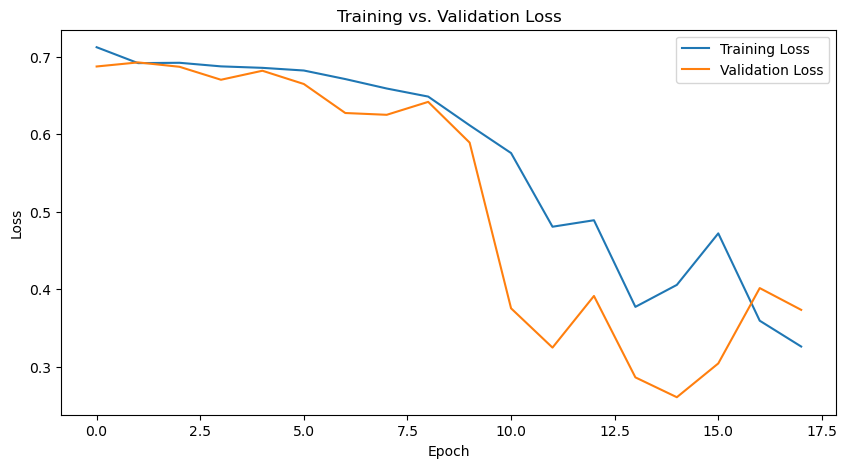

In [135]:
# 6.1

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

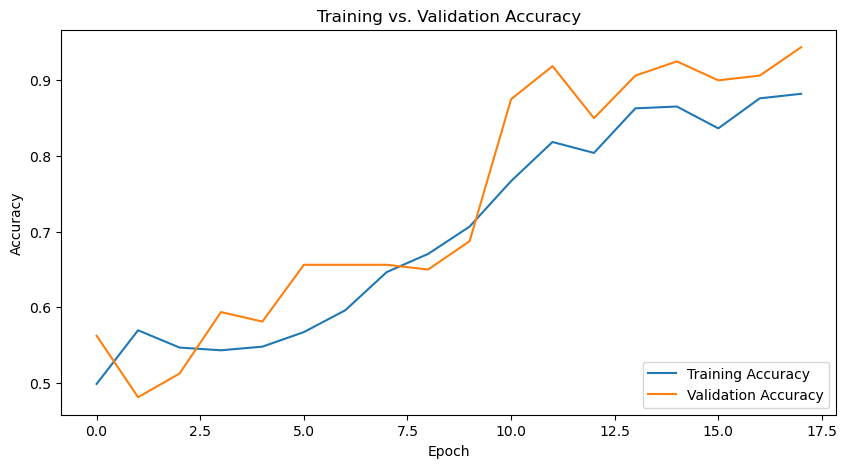

In [136]:
# 6.2

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [137]:
# 6.3
# Use markdown for your explanation

6.3.1 Ideal Number of Epochs:

Considering both the loss and accuracy graphs, the ideal number of epochs seems to be around 13-15. This range shows a high validation accuracy with a relatively stable validation loss.

6.3.2 Accuracy at Ideal Epoch:

Around epoch 13-15, the validation accuracy is high and closely aligns with the training accuracy, suggesting the model is performing well without overfitting at this point.

In [138]:
# 6.4
# Predict labels for the validation set
val_predictions = model.predict(validation_generator)
val_predictions = (val_predictions > 0.5).astype(int)  # Convert probabilities to binary labels

# Get true labels from the generator
true_labels = validation_generator.classes

# Print classification report
print(classification_report(true_labels, val_predictions, target_names=['Parasitized', 'Uninfected']))

173/173 ━━━━━━━━━━━━━━━━━━━━ 22s 126ms/step
              precision    recall  f1-score   support

 Parasitized       0.94      0.89      0.91      2756
  Uninfected       0.90      0.94      0.92      2756

    accuracy                           0.92      5512
   macro avg       0.92      0.92      0.92      5512
weighted avg       0.92      0.92      0.92      5512



## Great Job! 